
### Model that will predict whether or not they will click on an ad based off the features of that user
This data set contains the following features:

dd
1. 'Daily Time Spent on Site': consumer time on site in minutes
2. 'Age': cutomer age in years
3. 'Area Income': Avg. Income of geographical area of consumer
4. 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
5. 'Ad Topic Line': Headline of the advertisement
6. 'City': City of consumer
7. 'Male': Whether or not consumer was male
8. 'Country': Country of consumer
9. 'Timestamp': Time at which consumer clicked on Ad or closed window
9. 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [2]:
ad_data = pd.read_csv('../input/advertising.csv')
ad_data.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


# Discription of the dataset

In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis

Text(0.5, 0, 'Age')

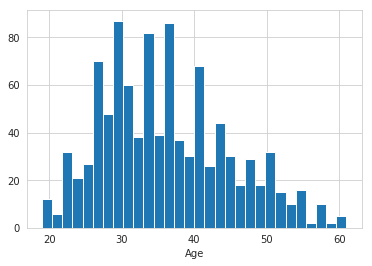

In [5]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


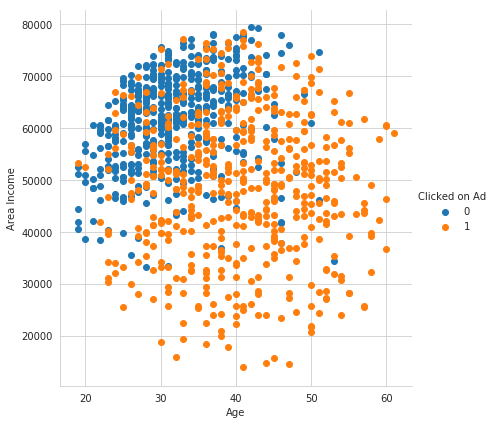

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(ad_data, hue="Clicked on Ad", size=6) \
   .map(plt.scatter, "Age", "Area Income") \
   .add_legend()

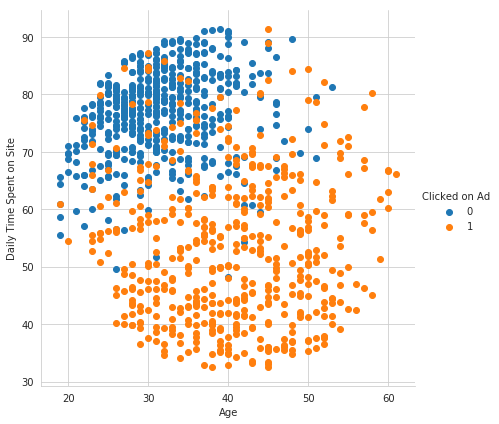

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(ad_data, hue="Clicked on Ad", size=6) \
   .map(plt.scatter, "Age", "Daily Time Spent on Site") \
   .add_legend()

people who spend less time daily clicked on AD

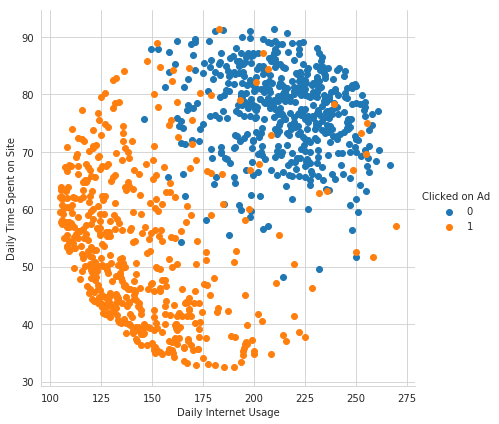

In [8]:
#sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)
sns.set_style("whitegrid");
sns.FacetGrid(ad_data, hue="Clicked on Ad", size=6) \
   .map(plt.scatter, "Daily Internet Usage", "Daily Time Spent on Site") \
   .add_legend()

people with less daily internet usage mostly click on the ad

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


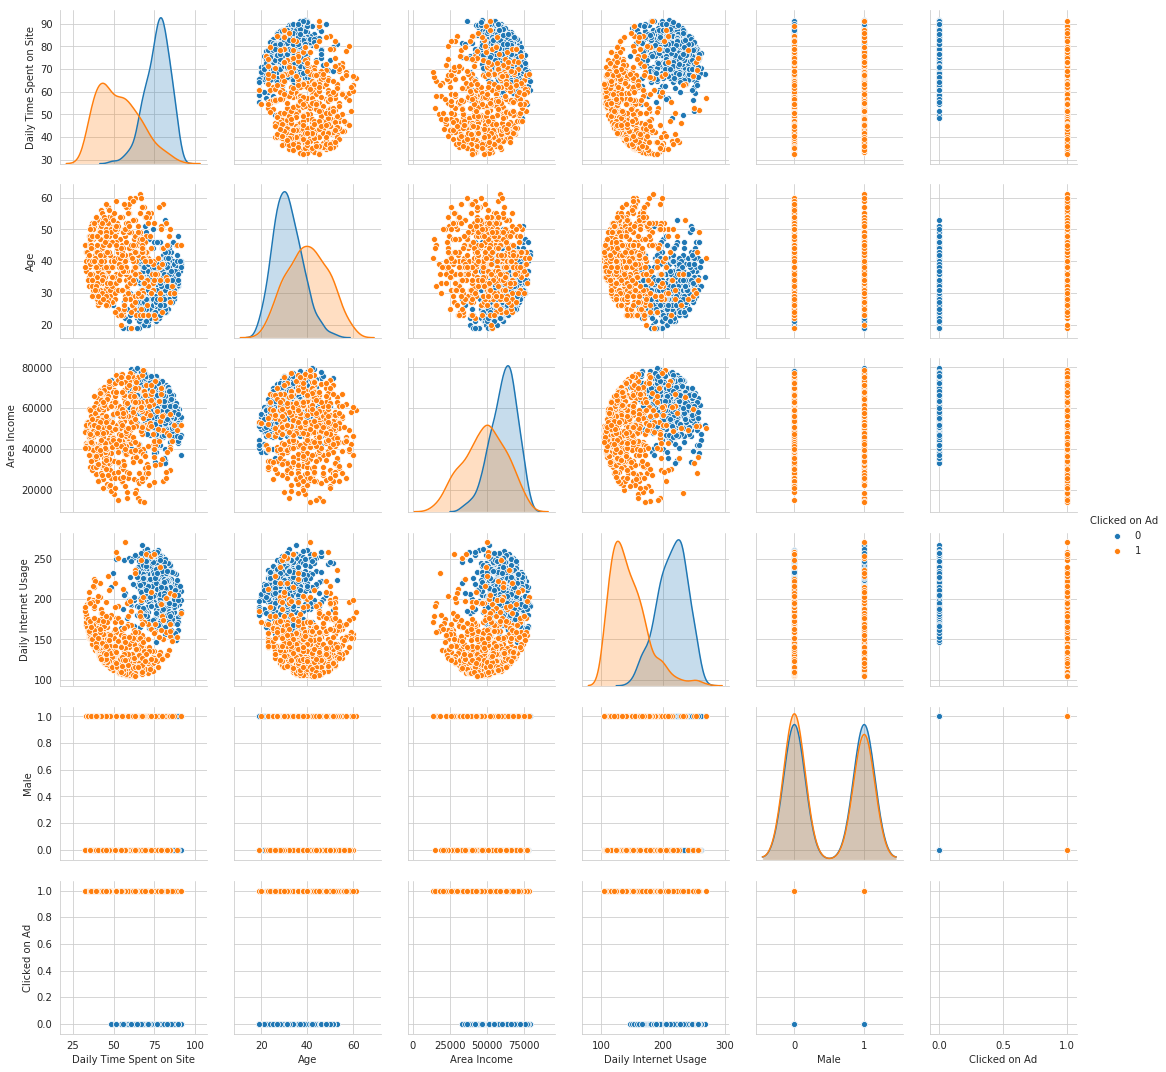

In [9]:
sns.pairplot(ad_data,hue='Clicked on Ad')

# Splitting the data

In [10]:
from sklearn.model_selection import train_test_split

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=455)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions and Evaluations

In [12]:
y_pred = logmodel.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       119
           1       0.97      0.88      0.92       131

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[115   4]
 [ 16 115]]
accuracy is 0.92
